In [1]:
import os 
path = 'C:/pytest/'
os.chdir(path)

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [4]:
data = pd.read_csv('income.csv')
print(data.columns)

Index(['age', 'workclass', 'education', 'educationNumber', 'maritalStatus',
       'occupation', 'relationship', 'race', 'gender', 'hourPerWeek',
       'nativeCountry', 'income'],
      dtype='object')


In [5]:
data.head()

,age,workclass,education,educationNumber,maritalStatus,occupation,relationship,race,gender,hourPerWeek,nativeCountry,income
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,4,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,4,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,4,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,3,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,3,Female,40,Cuba,0


In [6]:
X = data.loc[:,'age':'nativeCountry']
y = data.loc[:,'income']

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1   workclass        32561 non-null  object
 2   education        32561 non-null  object
 3   educationNumber  32561 non-null  int64 
 4   maritalStatus    32561 non-null  object
 5   occupation       32561 non-null  object
 6   relationship     32561 non-null  object
 7   race             32561 non-null  int64 
 8   gender           32561 non-null  object
 9   hourPerWeek      32561 non-null  int64 
 10  nativeCountry    32561 non-null  object
dtypes: int64(4), object(7)
memory usage: 2.7+ MB


In [169]:
# 수치형
X_num = X[['age','educationNumber','hourPerWeek']]
# 범주형, 문자형
# 숫자가 의미/강도를 나타내는 경우 -> 범주형
X_cat_part1 = X[['workclass','education','maritalStatus','occupation','relationship','gender','nativeCountry']]
X_cat_part2 = X[['race']].astype('str')
X_cat = pd.concat([X_cat_part1, X_cat_part2], axis =1)

In [170]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_num)

X_scaled = scaler.transform(X_num)

In [171]:
X_hot = pd.get_dummies(X_cat)
X_hot.head()

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,...,nativeCountry_ Thailand,nativeCountry_ Trinadad&Tobago,nativeCountry_ United-States,nativeCountry_ Vietnam,nativeCountry_ Yugoslavia,race_1,race_2,race_3,race_4,race_5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [172]:
X_final = pd.concat([pd.DataFrame(X_scaled).reset_index(drop=True), X_hot.reset_index(drop=True)], axis = 1)

In [173]:
X_final.head()

,0,1,2,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,nativeCountry_ Thailand,nativeCountry_ Trinadad&Tobago,nativeCountry_ United-States,nativeCountry_ Vietnam,nativeCountry_ Yugoslavia,race_1,race_2,race_3,race_4,race_5
0,0.301370,0.800000,0.397959,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0.452055,0.800000,0.122449,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0.287671,0.533333,0.397959,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0.493151,0.400000,0.397959,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0.150685,0.800000,0.397959,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [174]:
print(X_final.shape, y.shape)

(32561, 105) (32561,)


In [175]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X_final, y)

In [176]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape=(105,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1, activation= 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                6784      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 8,897
Trainable params: 8,897
Non-trainable params: 0
_________________________________________________________________


In [177]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['acc'])

history = model.fit(train_X, train_y, epochs = 30, validation_data=(test_X,test_y))

Epoch 1/30
764/764 [==============================] - 3s 3ms/step - loss: 0.3754 - acc: 0.8230 - val_loss: 0.3648 - val_acc: 0.8300
Epoch 2/30
764/764 [==============================] - 2s 3ms/step - loss: 0.3476 - acc: 0.8359 - val_loss: 0.3596 - val_acc: 0.8326
Epoch 3/30
764/764 [==============================] - 2s 3ms/step - loss: 0.3424 - acc: 0.8384 - val_loss: 0.3599 - val_acc: 0.8331
Epoch 4/30
764/764 [==============================] - 2s 3ms/step - loss: 0.3390 - acc: 0.8402 - val_loss: 0.3572 - val_acc: 0.8342
Epoch 5/30
764/764 [==============================] - 2s 3ms/step - loss: 0.3363 - acc: 0.8410 - val_loss: 0.3588 - val_acc: 0.8350
Epoch 6/30
764/764 [==============================] - 2s 3ms/step - loss: 0.3326 - acc: 0.8434 - val_loss: 0.3600 - val_acc: 0.8327
Epoch 7/30
764/764 [==============================] - 2s 3ms/step - loss: 0.3298 - acc: 0.8449 - val_loss: 0.3611 - val_acc: 0.8338
Epoch 8/30
764/764 [==============================] - 2s 3ms/step - loss: 0.

In [178]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc)+1)

In [179]:
import matplotlib.pyplot as plt

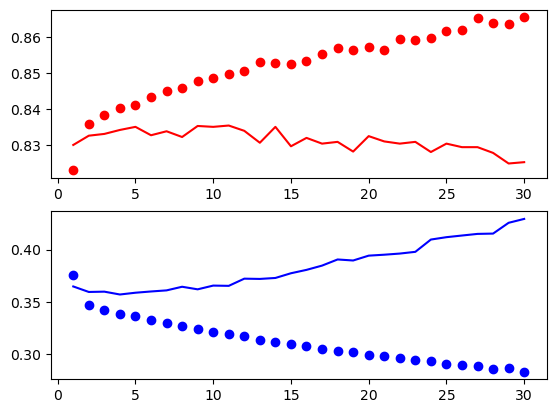

In [180]:
plt.subplot(211)
plt.plot(epochs,acc, 'ro')
plt.plot(epochs,val_acc, 'r')
plt.subplot(212)
plt.plot(epochs,loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.show()

In [181]:
test_data = pd.read_csv('income_test.csv')
test_data.head()

,age,workclass,education,educationNumber,maritalStatus,occupation,relationship,race,gender,hourPerWeek,nativeCountry
0,37,Private,Some-college,10,Divorced,Adm-clerical,Unmarried,4,Female,39,United-States
1,22,Private,12th,8,Never-married,Protective-serv,Own-child,3,Male,35,United-States
2,34,Private,Bachelors,13,Never-married,Exec-managerial,Not-in-family,4,Female,55,United-States
3,30,Private,HS-grad,9,Never-married,Craft-repair,Not-in-family,3,Male,46,United-States
4,38,Private,Bachelors,13,Divorced,Prof-specialty,Unmarried,3,Female,45,United-States


In [182]:
# 반드시 훈련데이터와 결합 후 원-핫 인코딩을 진행하여야 함
'''
pd.get_dummies()는
컬럼명과 그 컬럼의 원소의 종류를 가변수로 변환
테스트만으로 원핫인코딩을 진행하는 것은 컬럼이 부족할 수 있음
따라서 반드시 훈련데이터와 결합 후 원핫인코딩을 진행
'''
data_appended = test_data.append(X)

In [190]:
test_X_num = data_appended[['age','educationNumber','hourPerWeek']]
test_X_cat_part1 = data_appended[['workclass','education','maritalStatus','occupation','relationship','gender','nativeCountry']]
test_X_cat_part2 = data_appended[['race']].astype('str')
test_X_cat = pd.concat([test_X_cat_part1, test_X_cat_part2], axis =1)

In [191]:
# 숫자형 데이터 MinMaxScaler 정규화
test_X_scaled = scaler.transform(test_X_num)
# 범주형 원핫인코딩
test_X_hot = pd.get_dummies(test_X_cat)
# 숫자형 범주형 결합
test_X_final = pd.concat([pd.DataFrame(test_X_scaled).reset_index(drop=True)
                         ,test_X_hot.reset_index(drop=True)], axis =1)
# 테스트 데이터만 분리
test_X_only = test_X_final.iloc[0:10,:]

In [192]:
test_X_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32571 entries, 0 to 32560
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              32571 non-null  int64
 1   educationNumber  32571 non-null  int64
 2   hourPerWeek      32571 non-null  int64
dtypes: int64(3)
memory usage: 2.0 MB


In [193]:
for i, word in enumerate(data_1_hot.columns):
    if word not in test_X_hot.columns:
        print(word)

In [194]:
prediction = model.predict(test_X_only)
print(np.round(prediction, 2))

1/1 [==============================] - 0s 43ms/step
[[0.01]
 [0.  ]
 [0.36]
 [0.  ]
 [0.16]
 [0.06]
 [0.  ]
 [0.  ]
 [0.  ]
 [0.  ]]


In [195]:
result = []
for i, pred in enumerate(prediction):
    if pred > 0.1:
        result.append(str(i)+ ' above 50K')
    else:
        result.append(str(i)+ ' below 50K')
result

['0 below 50K',
 '1 below 50K',
 '2 above 50K',
 '3 below 50K',
 '4 above 50K',
 '5 below 50K',
 '6 below 50K',
 '7 below 50K',
 '8 below 50K',
 '9 below 50K']

In [145]:
data_1 = []
for i, column in enumerate(X.columns):
    if (i==0) | (i==3) |(i==7) |(i==9):
        variable = int(input('{} (수치형)는 ? : '.format(column)))
    else:
        variable = input('{} ({})는 ? : '.format(column, X[column].unique()))
    data_1.append(variable)
data_1 = pd.DataFrame(data_1).T
data_1.columns = X.columns
data_1_appended = data_1.append(X)
data_1_num = data_1_appended[['age','educationNumber','hourPerWeek']].astype('int32')
data_1_cat = data_1_appended[['workclass','education','maritalStatus','occupation','relationship','race','gender','nativeCountry']]

# 숫자형 데이터 MinMaxScaler 정규화
data_1_scaled = scaler.transform(data_1_num)
# 범주형 원핫인코딩
data_1_hot = pd.get_dummies(data_1_cat)
# 숫자형 범주형 결합
data_1_final = pd.concat([pd.DataFrame(data_1_scaled).reset_index(drop=True)
                         ,data_1_hot.reset_index(drop=True)], axis =1)
# 테스트 데이터만 분리
data_1_only = pd.DataFrame(data_1_final.iloc[0,:]).T

prediction = model.predict(data_1_only)
if prediction >0.1:
    print('above 50K')
else:
    print('below 50K')
print(np.round(prediction, 2))

age (수치형)는 ? : 50
workclass ([' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'])는 ? :  Self-emp-not-inc
education ([' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'])는 ? :  Bachelors
educationNumber (수치형)는 ? : 13
maritalStatus ([' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed'])는 ? :  Married-civ-spouse
occupation ([' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv'])는 ? :  Exec-managerial
relationship ([' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative'])는 ? :  Husband
race (수

InvalidArgumentError: Graph execution error:

Detected at node 'sequential/dense/MatMul' defined at (most recent call last):
    File "C:\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "C:\Anaconda3\lib\runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "C:\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Anaconda3\lib\site-packages\traitlets\config\application.py", line 978, in launch_instance
      app.start()
    File "C:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 712, in start
      self.io_loop.start()
    File "C:\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "C:\Anaconda3\lib\asyncio\base_events.py", line 534, in run_forever
      self._run_once()
    File "C:\Anaconda3\lib\asyncio\base_events.py", line 1771, in _run_once
      handle._run()
    File "C:\Anaconda3\lib\asyncio\events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 406, in dispatch_shell
      await result
    File "C:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 730, in execute_request
      reply_content = await reply_content
    File "C:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 387, in do_execute
      cell_id=cell_id,
    File "C:\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 528, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2976, in run_cell
      raw_cell, store_history, silent, shell_futures, cell_id
    File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3030, in _run_cell
      return runner(coro)
    File "C:\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 78, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3258, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3473, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\광주인공지능사관학교\AppData\Local\Temp\ipykernel_17132\1340581734.py", line 25, in <module>
      prediction = model.predict(data_1_only)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Anaconda3\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Anaconda3\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Anaconda3\lib\site-packages\keras\layers\core\dense.py", line 241, in call
      outputs = tf.matmul(a=inputs, b=self.kernel)
Node: 'sequential/dense/MatMul'
Matrix size-incompatible: In[0]: [1,105], In[1]: [101,64]
	 [[{{node sequential/dense/MatMul}}]] [Op:__inference_predict_function_124491]

In [163]:
sorted(list(data_1_hot.columns))

['education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'gender_ Female',
 'gender_ Male',
 'maritalStatus_ Divorced',
 'maritalStatus_ Married-AF-spouse',
 'maritalStatus_ Married-civ-spouse',
 'maritalStatus_ Married-spouse-absent',
 'maritalStatus_ Never-married',
 'maritalStatus_ Separated',
 'maritalStatus_ Widowed',
 'nativeCountry_ ?',
 'nativeCountry_ Cambodia',
 'nativeCountry_ Canada',
 'nativeCountry_ China',
 'nativeCountry_ Columbia',
 'nativeCountry_ Cuba',
 'nativeCountry_ Dominican-Republic',
 'nativeCountry_ Ecuador',
 'nativeCountry_ El-Salvador',
 'nativeCountry_ England',
 'nativeCountry_ France',
 'nativeCountry_ Germany',
 'nativeCountry_ Greece',
 '